In [1]:
#The main purpose here is to collect characteristics of Heart Attack or factors that contribute to it.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore",category=FutureWarning)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [2]:
data=pd.read_csv(r"C:\Users\user\Downloads\Heart_Attack.csv")

In [3]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [5]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [6]:
data.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [7]:
data.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin', 'class'], dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1319.0,56.191812,13.647315,14.000,47.000,58.000,65.0000,103.0
gender,1319.0,0.659591,0.474027,0.000,0.000,1.000,1.0000,1.0
impluse,1319.0,78.336619,51.630270,20.000,64.000,74.000,85.0000,1111.0
pressurehight,1319.0,127.170584,26.122720,42.000,110.000,124.000,143.0000,223.0
pressurelow,1319.0,72.269143,14.033924,38.000,62.000,72.000,81.0000,154.0
glucose,1319.0,146.634344,74.923045,35.000,98.000,116.000,169.5000,541.0
kcm,1319.0,15.274306,46.327083,0.321,1.655,2.850,5.8050,300.0
troponin,1319.0,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3


In [9]:
#Impluse and troponin has potensial outliers

In [10]:
data["gender"].value_counts()

1    870
0    449
Name: gender, dtype: int64

In [11]:
data["class"].value_counts()

positive    810
negative    509
Name: class, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

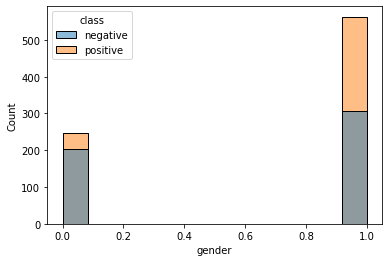

In [12]:
sns.histplot(x=data["gender"],hue=data["class"])

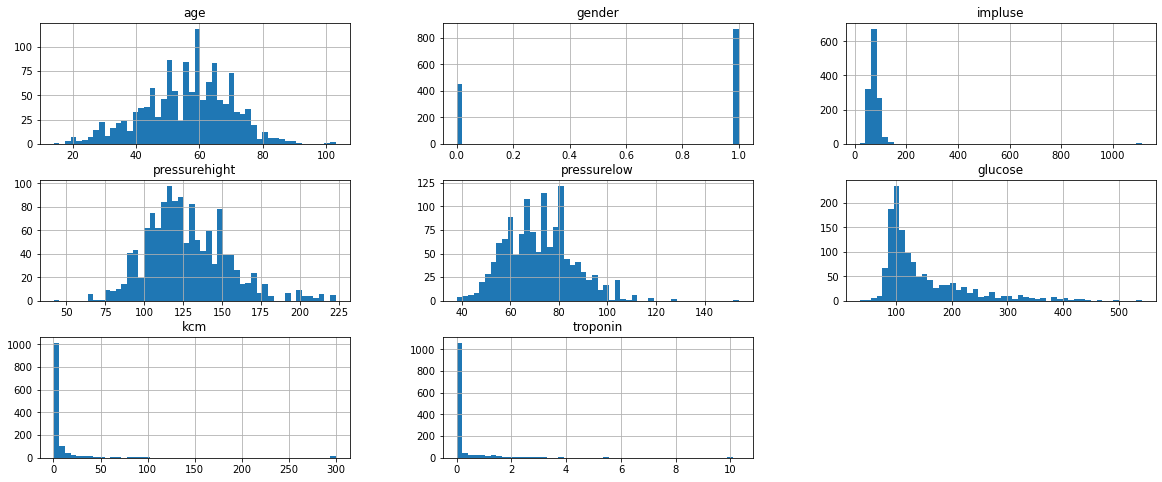

In [13]:
data.hist(bins=50,figsize=(20,8))
plt.title("Data distribution")
plt.show()

In [14]:
data.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin', 'class'], dtype='object')

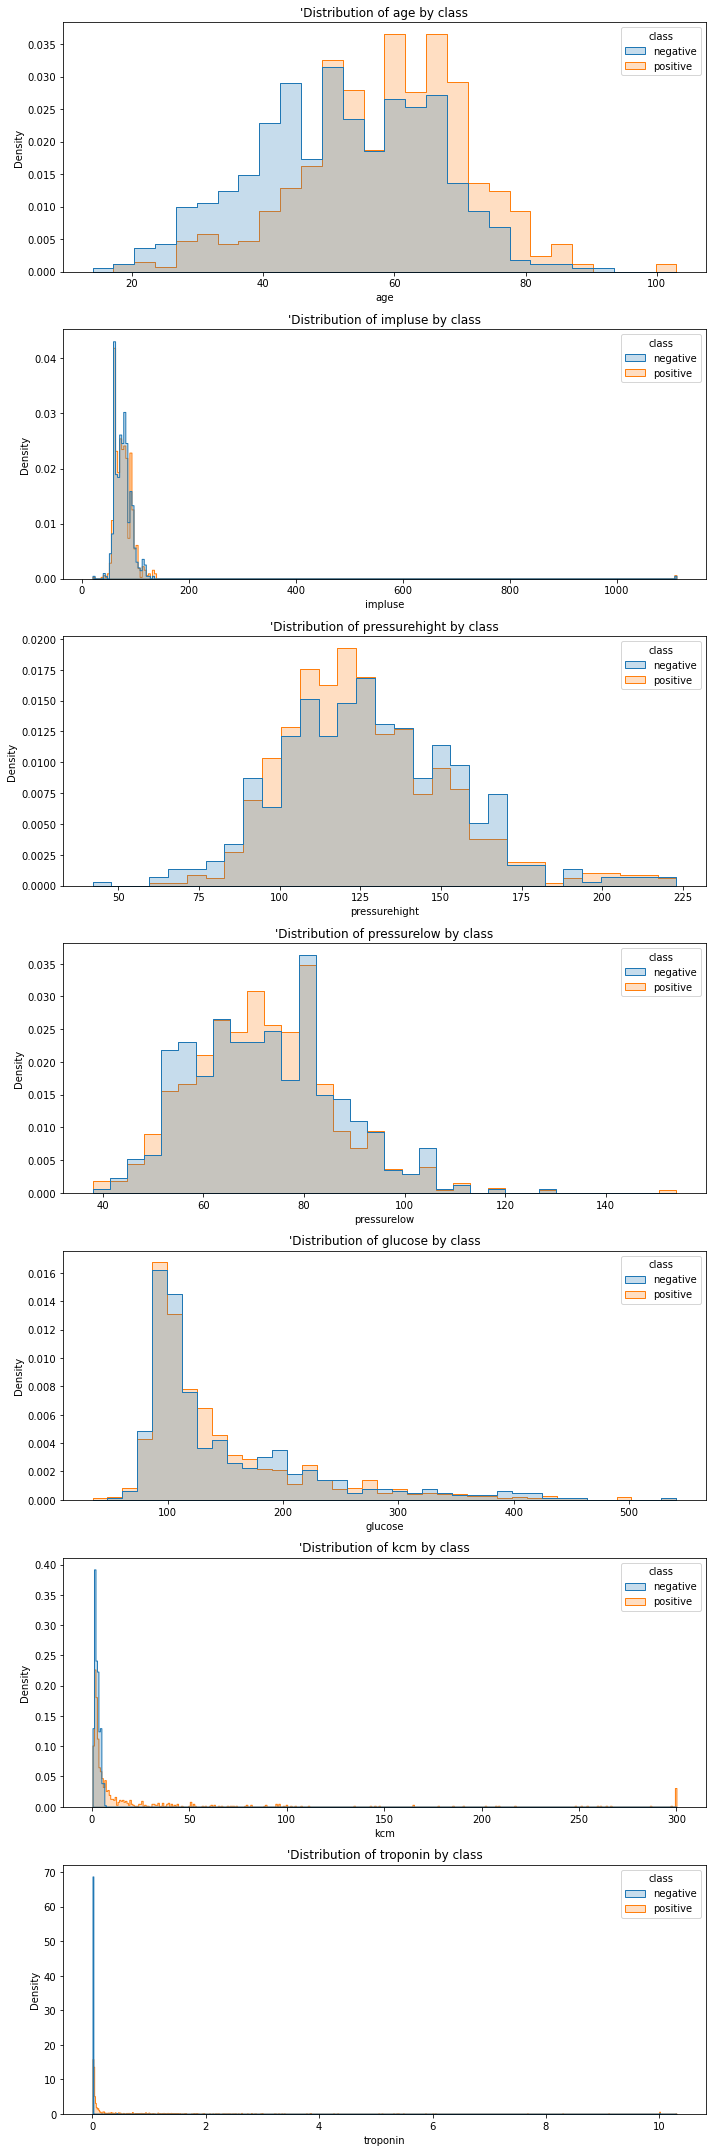

In [15]:
num=[i for i in data.columns if data[i].dtypes!="O" and i!="gender"]
num_plots=len(num)
fig,ax=plt.subplots(nrows=num_plots,figsize=(10,30))
for i, col in enumerate(num):
    sns.histplot(data=data,x=col,ax=ax[i], hue="class", element="step", stat="density", common_norm=False)
    ax[i].set_title(f"'Distribution of {col} by class")
plt.tight_layout()
plt.show()

In [16]:
data["class"]=LabelEncoder().fit_transform(data["class"])
#--OR--
#data["class"]=data["class"].map({"negative":0,"positive":1})
#data["class"]=data["class"].replace(["positive","negative"],[0,1])

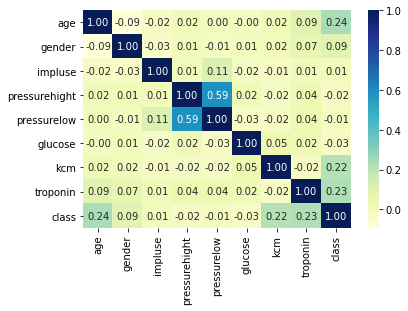

<Figure size 2160x720 with 0 Axes>

In [17]:
sns.heatmap(data.corr(),annot=True, fmt=".2f",cmap="YlGnBu")
plt.figure(figsize=(30,10))
plt.show()

In [18]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [20]:
X=data.drop(["class"],axis=1)
y=data["class"]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
print("X-Train :",X_train.shape)
print("X-Test :",X_test.shape)
print("Y-Train :",y_test.shape)
print("Y-Test :",y_test.shape)

X-Train : (1055, 8)
X-Test : (264, 8)
Y-Train : (264,)
Y-Test : (264,)


In [22]:
rd_model=RandomForestClassifier()
rd_model.fit(X_train,y_train)
y_pred = rd_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [26]:
forest_params={'n_estimators':[100, 200, 300],'max_depth':[5, 10, 20, 30,None],'min_samples_split':[2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [35]:
rd_gs_best=GridSearchCV(rd_model,forest_params,cv=5,n_jobs=1,verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [40]:
rd_final=rd_model.set_params(**rd_gs_best.best_params_,random_state=17).fit(X_train,y_train)

In [41]:
cv_results=cross_validate(rd_final,X_train,y_train,cv=5,scoring=["accuracy","f1"])

In [42]:
cv_results["test_accuracy"].mean()

0.9867298578199051

In [43]:
cv_results["test_f1"].mean()

0.9891223078331667

In [65]:
gr_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred=gr_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [66]:
gr_params = {'n_estimators': [50, 100, 150],'learning_rate': [0.05, 0.1, 0.15],'max_depth': [2, 3, 4,None],'min_samples_split': [2, 4, 6],'min_samples_leaf': [1, 2, 3]}

In [68]:
gr_best_grid=GridSearchCV(gr_model,gr_params,cv=5,n_jobs=1,verbose=True).fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [92]:
gr_final=gr_model.set_params(**gr_best_grid.best_params_,random_state=17).fit(X_train,y_train)

In [93]:
cv_results=cross_validate(gr_final,X_train,y_train, cv=5,scoring=["accuracy","f1"])

In [94]:
cv_results["test_accuracy"].mean()

0.9952606635071091

In [95]:
cv_results["test_f1"].mean()

0.9961389500924385

In [96]:
rd_importances = rd_final.feature_importances_
gr_importances = gr_final.feature_importances_

In [97]:
importance_data = pd.DataFrame({
    "Feature": X.columns,
    "Importance_RF": rd_importances,
    "Importance_GB": gr_importances
})

In [98]:
importance_data.sort_values(by='Importance_RF', ascending=False)

,Feature,Importance_RF,Importance_GB
7,troponin,0.595877,0.605728
6,kcm,0.263361,0.363305
0,age,0.047999,0.001024
5,glucose,0.026012,0.002877
3,pressurehight,0.024223,0.007827
4,pressurelow,0.019207,0.000452
2,impluse,0.015045,0.000481
1,gender,0.008275,0.018306
